In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('data/clara/wandb_export_2025-02-01T12_56_43.689+01_00.csv')


pd.set_option("display.max_columns", None)

In [55]:
data.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,_hash,data_path,dislike_threshold,end_sep,like_threshold,min_neg_ratings,min_pos_ratings,model_type,nb_neg,nb_pos,nb_test_users,offset,prompt_id,prompts,sep,users_seed,xp_name,ndcg_1,ndcg_1_std,ndcg_2,ndcg_2_std,ndcg_3,ndcg_3_std,ndcg_4,ndcg_4_std,ndcg_5,ndcg_5_std,pop_1,pop_1_std,precision_1,precision_1_std,precision_2,precision_2_std,precision_3,precision_3_std,precision_4,precision_4_std,precision_5,precision_5_std,recall_1,recall_1_std,recall_2,recall_2_std,recall_3,recall_3_std,recall_4,recall_4_std,recall_5,recall_5_std
0,lively-meadow-40,finished,-,NaN,NaN,2025-01-29T17:09:16.000Z,255,NaN,2104542884629435000,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,20,50,0,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,nb_pos,0.32,0.466476,0.433567,0.451301,0.533567,0.396180,0.602476,0.329171,0.656635,0.247209,6.539228,6.406129,0.32,0.466476,0.25,0.250000,0.233333,0.152753,0.215,0.086747,0.2,5.551115e-17,0.32,0.466476,0.50,0.500000,0.70,0.458258,0.86,0.346987,1,0
1,upbeat-sunset-39,finished,-,NaN,NaN,2025-01-29T17:05:35.000Z,215,NaN,1855903814960035000,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,15,50,0,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,nb_pos,0.32,0.466476,0.471423,0.439656,0.561423,0.381237,0.621718,0.316183,0.668140,0.240940,4.954826,4.507884,0.32,0.466476,0.28,0.248193,0.246667,0.146211,0.220,0.081240,0.2,5.551115e-17,0.32,0.466476,0.56,0.496387,0.74,0.438634,0.88,0.324962,1,0
2,youthful-blaze-38,finished,-,NaN,NaN,2025-01-29T17:02:38.000Z,170,NaN,1625489925582761500,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,10,50,0,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,nb_pos,0.28,0.448999,0.456660,0.427693,0.586660,0.335097,0.638342,0.266905,0.661553,0.223708,4.811574,4.743601,0.28,0.448999,0.28,0.248193,0.273333,0.128062,0.235,0.059372,0.2,5.551115e-17,0.28,0.448999,0.56,0.496387,0.82,0.384187,0.94,0.237487,1,0
3,quiet-pyramid-37,finished,-,NaN,NaN,2025-01-29T17:00:12.000Z,139,NaN,1066409631842160000,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,7,50,0,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,nb_pos,0.30,0.458258,0.426186,0.444949,0.476186,0.421736,0.570935,0.345621,0.640568,0.249060,5.130500,4.787612,0.30,0.458258,0.25,0.250000,0.200000,0.163299,0.205,0.096047,0.2,5.551115e-17,0.30,0.458258,0.50,0.500000,0.60,0.489898,0.82,0.384187,1,0
4,frosty-lion-36,finished,-,NaN,NaN,2025-01-29T16:58:04.000Z,121,NaN,453592704829253400,/root/.local/share/gpt-rec/ml-1m,2.5,",",4,5,21,gpt2,4,5,50,0,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",",",0,nb_pos,0.38,0.485386,0.455712,0.469144,0.585712,0.386925,0.637393,0.329783,0.683815,0.255699,5.946542,5.696880,0.38,0.485386,0.25,0.250000,0.253333,0.142361,0.220,0.081240,0.2,5.551115e-17,0.38,0.485386,0.50,0.500000,0.76,0.427083,0.88,0.324962,1,0


In [56]:
data_filtered = data[['State','Name', 'Runtime', 'model_type', 'nb_pos', 'ndcg_1', 'ndcg_1_std', 'pop_1', 'pop_1_std', 'precision_1', 'precision_1_std','prompt_id', 'prompts','nb_test_users', 'offset']]
#data_filtered = data_filtered.reset_index()
data_filtered.head()

,State,Name,Runtime,model_type,nb_pos,ndcg_1,ndcg_1_std,pop_1,pop_1_std,precision_1,precision_1_std,prompt_id,prompts,nb_test_users,offset
0,finished,lively-meadow-40,255,gpt2,20,0.32,0.466476,6.539228,6.406129,0.32,0.466476,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
1,finished,upbeat-sunset-39,215,gpt2,15,0.32,0.466476,4.954826,4.507884,0.32,0.466476,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
2,finished,youthful-blaze-38,170,gpt2,10,0.28,0.448999,4.811574,4.743601,0.28,0.448999,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
3,finished,quiet-pyramid-37,139,gpt2,7,0.30,0.458258,5.130500,4.787612,0.30,0.458258,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
4,finished,frosty-lion-36,121,gpt2,5,0.38,0.485386,5.946542,5.696880,0.38,0.485386,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0


In [57]:
data_filtered_prompt_id_0 = data_filtered[data_filtered['prompt_id'] == 0]
data_filtered_prompt_id_0 = data_filtered_prompt_id_0.dropna()
data_filtered_prompt_id_0.head()

,State,Name,Runtime,model_type,nb_pos,ndcg_1,ndcg_1_std,pop_1,pop_1_std,precision_1,precision_1_std,prompt_id,prompts,nb_test_users,offset
0,finished,lively-meadow-40,255,gpt2,20,0.32,0.466476,6.539228,6.406129,0.32,0.466476,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
1,finished,upbeat-sunset-39,215,gpt2,15,0.32,0.466476,4.954826,4.507884,0.32,0.466476,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
2,finished,youthful-blaze-38,170,gpt2,10,0.28,0.448999,4.811574,4.743601,0.28,0.448999,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
3,finished,quiet-pyramid-37,139,gpt2,7,0.30,0.458258,5.130500,4.787612,0.30,0.458258,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
4,finished,frosty-lion-36,121,gpt2,5,0.38,0.485386,5.946542,5.696880,0.38,0.485386,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0


In [58]:
data_filtered_prompt_id_0_gpt = data_filtered[(data_filtered['prompt_id'] == 0) & (data_filtered['model_type'] == "gpt2")]
data_filtered_prompt_id_0_gpt.head()

,State,Name,Runtime,model_type,nb_pos,ndcg_1,ndcg_1_std,pop_1,pop_1_std,precision_1,precision_1_std,prompt_id,prompts,nb_test_users,offset
0,finished,lively-meadow-40,255,gpt2,20,0.32,0.466476,6.539228,6.406129,0.32,0.466476,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
1,finished,upbeat-sunset-39,215,gpt2,15,0.32,0.466476,4.954826,4.507884,0.32,0.466476,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
2,finished,youthful-blaze-38,170,gpt2,10,0.28,0.448999,4.811574,4.743601,0.28,0.448999,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
3,finished,quiet-pyramid-37,139,gpt2,7,0.30,0.458258,5.130500,4.787612,0.30,0.458258,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0
4,finished,frosty-lion-36,121,gpt2,5,0.38,0.485386,5.946542,5.696880,0.38,0.485386,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0


In [59]:
data_filtered['MAP@1'] = data_filtered['precision_1'] / data_filtered['nb_test_users'] * 100
data_filtered.head()

/var/folders/2z/g8ydpyhx10zg0sz4jqvhznj00000gn/T/ipykernel_78955/2298054549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['MAP@1'] = data_filtered['precision_1'] / data_filtered['nb_test_users'] * 100


,State,Name,Runtime,model_type,nb_pos,ndcg_1,ndcg_1_std,pop_1,pop_1_std,precision_1,precision_1_std,prompt_id,prompts,nb_test_users,offset,MAP@1
0,finished,lively-meadow-40,255,gpt2,20,0.32,0.466476,6.539228,6.406129,0.32,0.466476,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0,0.64
1,finished,upbeat-sunset-39,215,gpt2,15,0.32,0.466476,4.954826,4.507884,0.32,0.466476,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0,0.64
2,finished,youthful-blaze-38,170,gpt2,10,0.28,0.448999,4.811574,4.743601,0.28,0.448999,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0,0.56
3,finished,quiet-pyramid-37,139,gpt2,7,0.30,0.458258,5.130500,4.787612,0.30,0.458258,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0,0.60
4,finished,frosty-lion-36,121,gpt2,5,0.38,0.485386,5.946542,5.696880,0.38,0.485386,0,"('[M]', 'Movies like [M]', 'Movies similar to ...",50,0,0.76


In [60]:
data_filtered_prompt_id_0_gpt['MAP@1'] = data_filtered_prompt_id_0_gpt['precision_1'] / data_filtered_prompt_id_0_gpt.shape[0] * 100

In [61]:
data_filtered_prompt_id_0_gpt.describe()

,Runtime,nb_pos,ndcg_1,ndcg_1_std,pop_1,pop_1_std,precision_1,precision_1_std,prompt_id,nb_test_users,offset,MAP@1
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.0,40.0,40.000000
mean,150.925000,7.875000,0.333500,0.467067,5.206926,5.207672,0.333500,0.467067,0.0,50.0,0.0,0.833750
std,57.396233,6.373774,0.061833,0.020221,0.652675,0.765018,0.061833,0.020221,0.0,0.0,0.0,0.154583
min,89.000000,1.000000,0.200000,0.400000,3.701681,3.390689,0.200000,0.400000,0.0,50.0,0.0,0.500000
25%,101.000000,2.750000,0.300000,0.458258,4.758741,4.740338,0.300000,0.458258,0.0,50.0,0.0,0.750000
50%,132.500000,6.000000,0.320000,0.466476,5.151849,5.166554,0.320000,0.466476,0.0,50.0,0.0,0.800000
75%,182.250000,11.250000,0.365000,0.481347,5.618291,5.747693,0.365000,0.481347,0.0,50.0,0.0,0.912500
max,264.000000,20.000000,0.520000,0.499600,6.943549,6.631524,0.520000,0.499600,0.0,50.0,0.0,1.300000


### 3.2 Mining Prompts for Recommendation

In [62]:
prompt_map = {
  "0": "[M]",
  "1": "Movies like [M]",
  "2": "Movies similar to [M]",
  "3": "Movies like: [M]",
  "4": "Movies similar to: [M]"
}

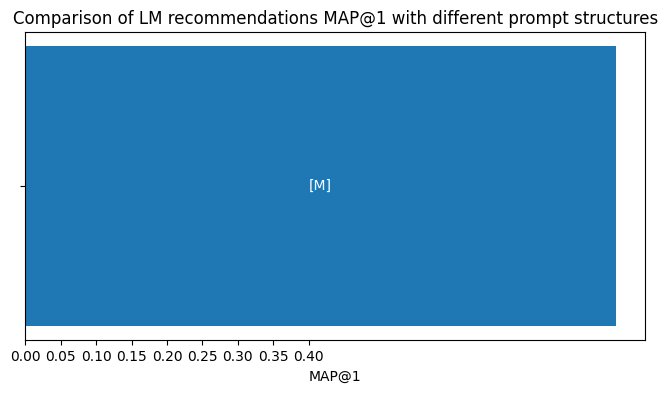

In [63]:
fig, ax = plt.subplots(figsize=(8, 4))

prompt_id = data_filtered_gpt2["prompt_id"].unique()
y_pos = np.arange(len(prompt_id))
map1 = data_filtered_gpt2.groupby("prompt_id")['MAP@1'].mean()

prompts = [prompt_map[str(pid)] for pid in prompt_id]

bars = ax.barh(y_pos, map1, align='center')
ax.set_yticks(y_pos)
ax.set_xticks(np.arange(0, 0.45, 0.05))
ax.set_yticklabels([])
ax.invert_yaxis()
ax.set_xlabel('MAP@1')
ax.set_title('Comparison of LM recommendations MAP@1 with different prompt structures')

for bar, prompt in zip(bars, prompts):
    ax.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, prompt, ha='center', va='center', color='white')

plt.show()

### 3.3 Effect of the Number of Ratings Per Test User

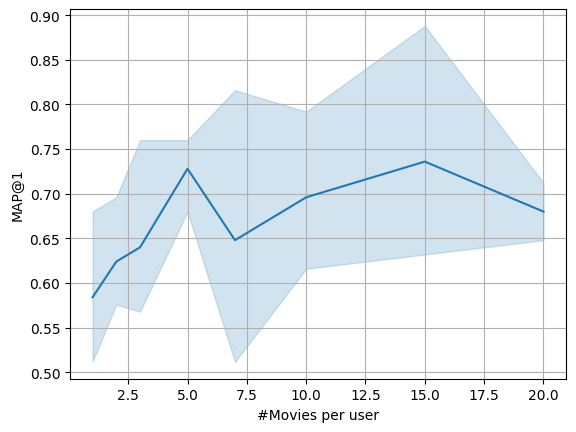

In [64]:
sns.lineplot(data=data_filtered, x="nb_pos", y="MAP@1")
plt.xlabel("#Movies per user")
plt.grid(True)

### 3.4 Comparison with Matrix Factorization and NSP

In [65]:
data_filtered_bpr

,index,State,Name,Runtime,model_type,nb_pos,ndcg_1,ndcg_1_std,pop_1,pop_1_std,precision_1,precision_1_std,prompt_id,prompts,nb_test_users,offset,MAP@1


All BPR runs have failed.

In [66]:
#sns.lineplot(data=data_filtered, x="nb_test_users", y="MAP@1", hue="model_type")

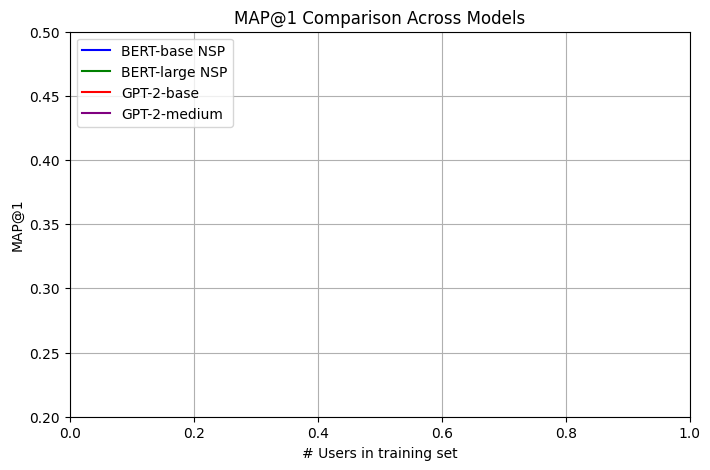

In [67]:
x_range = np.linspace(0, 20)

plt.figure(figsize=(8, 5))

plt.axhline(data_filtered_bert_base['MAP@1'].mean(), color="b", label="BERT-base NSP")
plt.axhline(data_filtered_bert_large['MAP@1'].mean(), color="g", label="BERT-large NSP")
plt.axhline(data_filtered_gpt2['MAP@1'].mean(), color="r", label="GPT-2-base")
plt.axhline(data_filtered_gpt_medium['MAP@1'].mean(), color="purple", label="GPT-2-medium")

plt.ylim(0.2, 0.5)
plt.xlabel("# Users in training set")
plt.ylabel("MAP@1")
plt.title("MAP@1 Comparison Across Models")

plt.legend(loc=2)
plt.grid()
plt.show()